# Example 5.3.2

This notebook demonstrates the results of subsection 5.3.2 of [1]. Here, we will compute the $\hat{Z}$ invariant with defects of the homology sphere $M\left(-1; -\frac{1}{2}, -\frac{1}{3}, -\frac{1}{8}\right) = S^3_{-2}(\mathbf{3}^l_1)$ and $-M\left(-1; -\frac{1}{2}, -\frac{1}{3}, -\frac{1}{8}\right) = S^3_{+2}(\mathbf{3}^r_1)$ by leveraging Conjecture 3 of the paper.

### No wilson line insertion, negative side

From equation 2.18, which we have 
$$
\hat{Z}_{b_0} (S_{-2}^{3}(\mathbf{3}_1^l);\tau ) \sim  
\sum_{n=0}^{\infty}a_{-n-1}(\mathbf{3}_1^l;q)\frac{q^{n^{2}}}{\left(q^{n+1};q\right)_{n}}P^{p,b}_{n}(q^{-1})
$$
which we directly use to figure out the invariant. 
Inserting the Habiro coefficients for the left handed trefoil
$$
a_{-m}(\mathbf{3}_1^l;q) = (-1)^{m}q^{\tfrac{m(m-3)}{2}}
$$
this leads us to

In [20]:
from sage.combinat.q_analogues import q_pochhammer
def habiro_3l(m):
    q = var('q')
    return (-1)^(m) * q^(m*(m+3)/2)
Zhat_habiro = sum(habiro_3l(-n-1) * q^(n^2)/q_pochhammer(n,q^(n+1)) for n in range(0, 10)).series(q, 20)
Zhat_habiro

(-1)*q^(-1) + 1 + 1*q^2 + 1*q^6 + (-1)*q^7 + (-1)*q^13 + (-1)*q^19 + Order(q^20)

Which we compare with the result from the plumbing description

In [18]:
from pyPlumbing import Plumbing
P = Plumbing.from_Brieskorn([2,3,5])
P.zhat(["A",1], P.trivial_spin_c(["A",1]),20)

q^(-3/2)(1 - 1q^(1) - 1q^(3) - 1q^(7) + 1q^(8) + 1q^(14) + 1q^(20) + O(q^21))

### Wilson line insersion of $W_1$, negative side

In our case Equation 2.22 reduces to
$$
\hat{Z}_{b_0}(S_{-1}^{3}(\mathbf{3}_1^l);W_{1};\tau)\sim\left(a_{-1}(\mathbf{3}_1^l\mathbf{3}_1^l;q)\mathcal{L}_{-1}^{(1)}\left[x^{{1\over 2}} + x^{-{1\over 2}}\right] +\sum_{m=1}^{\infty} \mathcal{L}_{-1}^{(1)}\left[\left(x^{{1\over 2}}  +  x^{-{1\over 2}}       \right)\frac{a_{-m-1}(K;q)}{\prod_{j=1}^{m}(x+x^{-1}-q^{j}-q^{-j})}\right]\right)\\
=2a_{-1}(\mathbf{3}_1^l;q)q^{1\over 4}+\sum_{n=1}^{\infty} a_{-n-1}(K;q)\frac{q^{n^2-n+{1\over 4}}}{(q^n;q)_n}
$$
where we used equation 2.24 in the last line. This leads to

In [27]:
Zhat_habiro_w1 = q^(1/4)*(habiro_3l(-1)*2 + sum(habiro_3l(-n-1) * q^(n^2-n)/q_pochhammer(n,q^(n)) for n in range(1, 10))).series(q, 20)
Zhat_habiro_w1

q^(1/4)*((-1)*q^(-1) + 1 + 1*q + 1*q^3 + (-1)*q^10 + (-1)*q^14 + (-1)*q^17 + Order(q^20))

Which we compare to the result of the plumbing desctiption

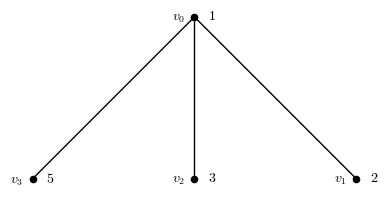

In [28]:
P.display()

In [29]:
P.zhat(["A",1], P.trivial_spin_c(["A",1]),20,wilson=[vector([0])]*3+[vector([1])])

q^(-5/4)(1 - 1q^(1) - 1q^(2) - 1q^(4) + 1q^(11) + 1q^(15) + 1q^(18) + O(q^19))

Which matches up to an overall sign and $q$-power.

## Conclusion
Comparing the results, we can see that we have covered the whole Weil representation with defect $\hat{Z}$ invariants. Therefore we have demonstrated the Modularity Conjecture, Conjecture 4 of [1] using knot surgeries and the defect surgery formula.